# Overfitting Review for Gradient Boosting Classifier
In this notebook I am going to check if the Gradient Boosting rating is overfitted.
    
> A model thats fits the training set well but testing set poorly is said to be overfit to the training set and a model that fits both sets poorly is said to be underfit.
>
> — <cite>[This article](https://towardsdatascience.com/the-relationship-between-bias-variance-overfitting-generalisation-in-machine-learning-models-fb78614a3f1e)</cite>

The code used is from [here](https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b)

## Loading the data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data
from benchtools.src.datatools import read_multifiles

df = read_multifiles(filename='RD_dataset', nbatch=10)
df.shape

(512000, 18)

Checking the data

In [3]:
df.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons,label
0,1286.727685,106.912129,0.185508,-2.763676,1313.290435,0.624659,36,1283.220733,63.164215,0.064989,0.393688,1287.481934,0.713248,33,2580.489568,3.159663,109.0,0.0
1,1354.394070,614.269108,0.826505,1.365524,1943.559886,0.311688,84,1325.613761,439.064150,-0.874319,-1.786248,1916.370744,0.276881,97,3859.315047,3.581406,208.0,0.0
2,1214.955723,645.865619,-0.196786,2.040545,1396.840654,0.238205,119,1072.462085,113.768840,0.143831,-1.090330,1089.530630,0.726963,59,2480.769725,3.149348,196.0,0.0
3,1285.227873,516.835248,0.328693,2.975321,1450.485926,0.013429,65,1220.251279,174.796077,0.294854,-0.322661,1285.618789,0.706361,89,2609.893413,3.298155,183.0,0.0
4,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,0.423550,54,1091.785816,155.362262,1.060534,0.264977,1772.340209,0.787662,57,3313.488835,3.629229,169.0,1.0


**Separating the dataframe** into a dataframe with the characteristics and another with the labels: 

In [4]:
from benchtools.src.datatools import separate_data
X, y = separate_data(df, standardize=False)

## Building and testing the model

In [5]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

kf = KFold(n_splits=4)
mae_train = []
mae_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

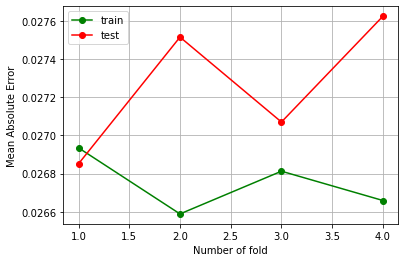

In [6]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

The MAE for the training set is around 0.0266 and 0.0270 for the k folds. The MAE of the test set ranges from 0.0268 to 0.0276. Both values seem small, so there appears to not be overfitting. However, we can try various methods to avoid overfitting and see the result. Some methods are:
- Reduce complexity
- Adjust parameters
- Change the model

Let's group the above code into a function: 

In [11]:
def test_model(model, X, y):
    
    # Entrenamos iterativamente y calcumamos MAE
    kf = KFold(n_splits=4)
    mae_train = []
    mae_test = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
    
    # Graficamos
    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

## Reduce complexity
We will try to improve the model by scaling the input variables to values between 0 and 1. For this we use <code> MinMaxScaler </code> 

In [9]:
X, y = separate_data(df, standardize=True)
X.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrons_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrons_j2,m_jj,deltaR_j12,n_hadrons
0,0.030817,0.060442,0.536650,0.060146,0.023201,0.475308,0.137795,0.258928,0.038205,0.513989,0.562658,0.158542,0.542914,0.129032,0.180303,0.459224,0.136752
1,0.054860,0.347274,0.677163,0.717330,0.153416,0.237166,0.326772,0.271299,0.265572,0.320331,0.215710,0.273607,0.210758,0.387097,0.339517,0.568772,0.305983
2,0.005314,0.365137,0.452848,0.824763,0.040463,0.181252,0.464567,0.197425,0.068814,0.530244,0.326469,0.122324,0.553353,0.233871,0.167888,0.456545,0.285470
3,0.030284,0.292191,0.568038,0.973537,0.051546,0.010218,0.251969,0.240553,0.105727,0.561380,0.448647,0.158201,0.537672,0.354839,0.183964,0.495198,0.263248
4,0.003701,0.073212,0.332710,0.041100,0.075689,0.322283,0.208661,0.203064,0.093972,0.719241,0.542173,0.247254,0.599557,0.225806,0.271561,0.581194,0.239316


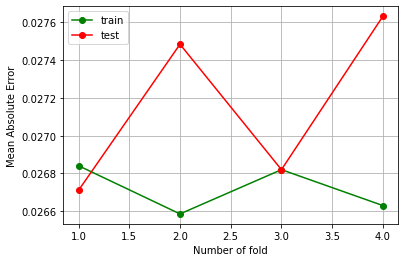

In [12]:
model = GradientBoostingClassifier()
test_model(model, X, y)

The obtained indicates that scaling the variables does not decrease or increase the error.

To reduce the complexity we can also reduce the number of features. We can do this with Principal Component Analysis (PCA). We can reduce the number of features from 17 to 5: 

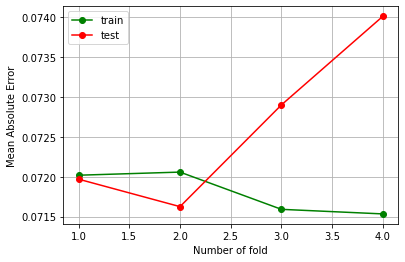

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)
test_model(model, X_pca, y)

Decreasing the number of features increases both the error in the test set and the training set. 

## Tune parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1,1),
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'max_features' : ['auto', 'sqrt', 'log2', int, float]
}
grid = GridSearchCV(model, param_grid = param_grid, cv=4)
grid.fit(X, y)
best_estimator = grid.best_estimator_

In [ ]:
test_model(best_estimator, X,y)

## Change of model 
Let's see if changing the model reduces errors: 

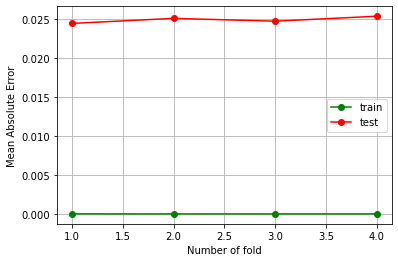

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
test_model(model, X, y)